# Cellular automata

Code examples from [Think Complexity, 2nd edition](http://greenteapress.com/wp/complexity2), Chapter 5

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [12]:
from __future__ import print_function, division

%matplotlib inline
%precision 3

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import random
import networkx as nx
import numpy as np

import thinkcomplexity
import thinkplot

# colors from our friends at http://colorbrewer2.org
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

In [13]:
from thinkstats2 import RandomSeed
RandomSeed(17)

In [175]:
import numpy as np

class CA(object):
    """Represents a 1-D a cellular automaton"""

    def __init__(self, rule, n, ratio=2):
        """Initializes the CA.

        rule: integer
        n: number of rows
        m: number of columns


        Attributes:
        table:  rule dictionary that maps from triple to next state.
        array:  the numpy array that contains the data.
        next:   the index of the next empty row.
        """
        rule = np.array([rule], dtype=np.uint8)
        self.table = np.unpackbits(rule)[::-1]
        self.n = n
        self.m = int(ratio * n + 1)
        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m//2] = 1
        self.next += 1

    def start_random(self):
        """Start with random values in the top row."""
        self.array[0] = np.random.random(self.m).round()
        self.next += 1

    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array."""
        a = self.array
        i = self.next
        window = [1,2,4]
        convolved = np.convolve(a[i-1], window, mode='same')
        a[i] = self.table[convolved]
        self.next += 1

    def get_array(self, start=0, end=None):
        """Gets a slice of columns from the CA.

        Avoids copying if possible.

        start: index of first column
        end: index of the last column plus one
        """
        if start==0 and end==None:
            return self.array
        else:
            return self.array[:, start:end]


def print_table(table):
    """Prints the rule table in LaTeX format."""
    print('\\beforefig')
    print('\\centerline{')
    print('\\begin{tabular}{|c|c|c|c|c|c|c|c|c|}')
    print('\\hline')

    res = ['prev'] + ['{0:03b}'.format(i) for i in range(8)]
    print(' & '.join(res) + ' \\\\ \n\\hline')

    res = ['next'] + [str(x) for x in table]
    print(' &   '.join(res) + ' \\\\ \n\\hline')

    print('\\end{tabular}}')

In [176]:
import numpy as np
import matplotlib.pyplot as plt
        

class PyplotDrawer:
    """Implementation of Drawer using matplotlib."""
        
    def draw(self, ca, start=0, end=None):
        """Draws the CA using pyplot.pcolor."""
        a = ca.get_array(start, end)
        rows, cols = a.shape

        # flipud puts the first row at the top; 
        # negating it makes the non-zero cells black.
        plt.pcolor(-np.flipud(a))
        plt.gray()
        plt.axis([0, cols, 0, rows])

        # empty lists draw no ticks
        plt.xticks([])
        plt.yticks([])

    def show(self):
        """display the pseudocolor representation of the CA"""
        plt.show()

    def save(self, filename='ca.png'):
        """save the pseudocolor representation of the CA in (filename)."""
        plt.savefig(filename)


class EPSDrawer:
    """Implementation of Drawer using encapsulated Postscript (EPS)."""

    def __init__(self):
        self.cells = []

    def draw(self, ca, start=0, end=None):
        a = ca.get_array(start, end)
        self.n, self.m = a.shape
        for i in xrange(self.n):
            for j in xrange(self.m):
                if a[i, j]:
                    self.cells.append((i, j))
        
    def save(self, filename='ca.eps'):
        with open(filename, 'w') as fp:
            self.print_header(fp)
            self.print_outline(fp)
            self.print_cells(fp)
            self.print_footer(fp)

    def print_cells(self, fp):
        for i, j in self.cells:
            fp.write('%d %d c\n' % (j, i))

    def print_header(self, fp, size=0.9, border=2):
        fp.write('%!PS-Adobe-3.0 EPSF-3.0\n')
        fp.write('%%%%BoundingBox: %d %d %d %d\n' % 
                 (border, border, self.m+border, self.n+border))

        fp.write('1 -1 scale\n')
        fp.write('0 %d translate\n' % -self.n)
        fp.write('/c {\n')
        fp.write('   newpath moveto\n')
        fp.write('   0 %g rlineto\n' % size)
        fp.write('   %g 0 rlineto\n' % size)
        fp.write('   0 -%g rlineto\n' % size)
        fp.write('   closepath fill\n')
        fp.write('} def\n')

    def print_outline(self, fp):
        fp.write('newpath 0.1 setlinewidth 0 0 moveto\n')
        fp.write('0 %d rlineto\n' % self.n)
        fp.write('%d 0 rlineto\n' % self.m)
        fp.write('0 -%d rlineto\n' % self.n)
        fp.write('closepath stroke\n')

    def print_footer(self, fp):
        fp.write('%%EOF\n')

In [177]:
rule = 50
n = 4
ca = CA(rule, n)
ca.start_single()

print(ca.table)

[0 1 0 0 1 1 0 0]


In [178]:
a = ca.array
print(a[0])

[0 0 0 0 1 0 0 0 0]


In [179]:
window = [1,2,4]
convolved = np.convolve(a[0], window, mode='same')
print(convolved)


[0 0 0 1 2 4 0 0 0]


In [180]:
a[1] = ca.table[convolved]
print(a[1])

[0 0 0 1 0 1 0 0 0]


In [181]:
rule = 50
n = 10
ca = CA(rule, n)
ca.start_single()
ca.loop(n-1)

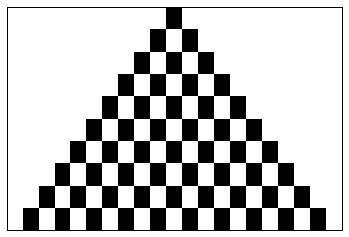

In [182]:
drawer = PyplotDrawer()
drawer.draw(ca)
drawer.show()
drawer.save('chap05-1.png')

In [183]:
drawer = EPSDrawer()
drawer.draw(ca)
drawer.save('chap05-1.eps')

In [184]:
print_table(ca.table)

\beforefig
\centerline{
\begin{tabular}{|c|c|c|c|c|c|c|c|c|}
\hline
prev & 000 & 001 & 010 & 011 & 100 & 101 & 110 & 111 \\ 
\hline
next &   0 &   1 &   0 &   0 &   1 &   1 &   0 &   0 \\ 
\hline
\end{tabular}}


In [102]:
class CircularCA(CA):
    """A variation of CA that wraps around so that the cells are
    arranged in a ring.
    """
    def __init__(self, rule, n=100, ratio=2):
        """n, m are the number of rows, columns.
        array is the numpy array that contains the data.
        next is the index of the next empty row.
        """
        self.table = self.make_table(rule)
        self.n = n
        # allocate two extra cells for ghosts
        self.m = int(ratio*n + 1 + 2)
        self.array = np.zeros((self.n, self.m), dtype=np.int8)
        self.next = 0

    def step(self):
        """Executes one time step by computing the next row of the array."""
        i = self.next
        self.next += 1

        a = self.array
        t = self.table

        # copy the ghost cells
        a[i-1,0] = a[i-1,self.m-2]
        a[i-1,self.m-1] = a[i-1,1]

        for j in xrange(1,self.m-1):
            a[i,j] = t[tuple(a[i-1, j-1:j+2])]

    def get_array(self, start=0, end=None):
        """get a slice of columns from the CA, with slice indices
        (start, end).  We need to add one to avoid ghost cells.
        """
        if end==None:
            return self.array[:, start+1:self.m-1]
        else:
            return self.array[:, start+1:end+1]

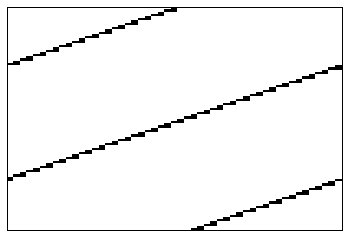

In [104]:
rule = 134
n = 100
ca = CircularCA(rule, n, ratio=0.5)
ca.start_single()
ca.loop(n-1)

drawer = PyplotDrawer()
drawer.draw(ca)

In [120]:
np.unpackbits(np.array([8], dtype=np.uint8))

array([0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)